## 1. Read the dataset

In [368]:
import pandas as pd

train_data_original = pd.read_csv("basket_data_by_date_train.csv")
test_data_original = pd.read_csv("basket_data_by_date_test.csv")


Check the structure and content of the dataset

In [369]:
print("Train Data Info:")
print(train_data_original.info())

print("\nTest Data Info:")
print(test_data_original.info())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      40000 non-null  int64  
 1   Itemname    40000 non-null  object 
 2   Quantity    40000 non-null  int64  
 3   Date        40000 non-null  object 
 4   Price       40000 non-null  float64
 5   CustomerID  40000 non-null  int64  
 6   cost        40000 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 2.1+ MB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      10000 non-null  float64
 1   Itemname    10000 non-null  object 
 2   Quantity    10000 non-null  float64
 3   Date        10000 non-null  object 
 4   Price       10000 non-null  float64
 5   CustomerID  10000 non-

In [370]:
test_data_original.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,545209.692000,3.672100,3.971454,15433.082900,11.840678
std,492.638789,2.639788,6.777596,1616.660727,13.086198
min,544398.000000,1.000000,0.160000,12352.000000,0.190000
25%,544795.000000,2.000000,1.650000,14227.000000,3.750000
50%,545181.000000,3.000000,2.950000,15358.000000,9.900000
75%,545664.000000,6.000000,4.950000,16931.000000,16.500000
max,546084.000000,10.000000,195.000000,18283.000000,290.000000


In [371]:
train_data_original.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,540254.879225,3.487700,3.732165,15577.606525,11.097411
std,2380.444952,2.611766,5.711630,1730.347123,13.298301
min,536365.000000,1.000000,0.100000,12347.000000,0.140000
25%,538093.000000,1.000000,1.650000,14224.000000,3.300000
50%,540373.000000,2.000000,2.950000,15570.000000,7.950000
75%,542360.000000,6.000000,4.650000,17220.000000,15.800000
max,544398.000000,10.000000,295.000000,18283.000000,527.700000


In [372]:
negative_quantity_test = test_data_original[test_data_original['Quantity'] < 0]
print(negative_quantity_test)

Empty DataFrame
Columns: [BillNo, Itemname, Quantity, Date, Price, CustomerID, cost]
Index: []


In [373]:
negative_quantity_train = train_data_original[train_data_original['Quantity'] < 0]
print(negative_quantity_train)

Empty DataFrame
Columns: [BillNo, Itemname, Quantity, Date, Price, CustomerID, cost]
Index: []



Based on the information provided about the data, it can be seen that both the training and test sets contain seven columns, which are:

BillNo, Itemname, Quantity, Date, Price, CustomerID, cost

## 2. Pre-process the data

#### 2.1 Clean the missing value

In [374]:
# check if there are missing values in the train set
print("Train Data Missing Values:")
print(train_data_original.isnull().sum())

# check if there are missing values in the test set
print("\nTest Data Missing Values:")
print(test_data_original.isnull().sum())

Train Data Missing Values:
BillNo        0
Itemname      0
Quantity      0
Date          0
Price         0
CustomerID    0
cost          0
dtype: int64

Test Data Missing Values:
BillNo        30000
Itemname      30000
Quantity      30000
Date          30000
Price         30000
CustomerID    30000
cost          30000
dtype: int64


The data shows that the dataset of Test Data contains a large number of missing values, which is 30,000 in number. So I will deal with these missing values.

In [375]:
test_data_original.tail(20)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
39980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39981,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39982,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39983,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39984,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39986,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39987,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39988,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39989,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From here we can see that the missing values are all at the tail of the dataset. So I'm going to delete all the data after 10000.

In [376]:
test_data_clean = test_data_original

In [377]:
# 删除从第10001行开始的缺失值
test_data_clean = test_data_original.iloc[:10000]

# 检查删除缺失值后的数据集大小
print("The size after cleaned the missing values", test_data_clean.shape)

The size after cleaned the missing values (10000, 7)


See if there is any missing values at the end of the dataset

In [378]:
test_data_clean.tail(10)

,BillNo,Itemname,Quantity,Date,Price,CustomerID,cost
9990,546084.0,JUMBO STORAGE BAG SKULLS,10.0,9/03/2011 11:28,1.95,14112.0,19.50
9991,546084.0,SET 3 SONG BIRD PAPER EGGS ASSORTED,6.0,9/03/2011 11:28,2.95,14112.0,17.70
9992,546084.0,COFFEE MUG APPLES DESIGN,6.0,9/03/2011 11:28,2.55,14112.0,15.30
9993,546084.0,RED RETROSPOT SMALL MILK JUG,6.0,9/03/2011 11:28,2.55,14112.0,15.30
9994,546084.0,JUMBO BAG RED RETROSPOT,10.0,9/03/2011 11:28,1.95,14112.0,19.50
9995,546084.0,EASTER TIN CHICKS PINK DAISY,6.0,9/03/2011 11:28,1.65,14112.0,9.90
9996,546084.0,CREAM CUPID HEARTS COAT HANGER,4.0,9/03/2011 11:28,4.15,14112.0,16.60
9997,546084.0,RED RETROSPOT BOWL,8.0,9/03/2011 11:28,1.25,14112.0,10.00
9998,546084.0,RED RETROSPOT CAKE STAND,1.0,9/03/2011 11:28,10.95,14112.0,10.95
9999,546084.0,RED RETROSPOT CHARLOTTE BAG,10.0,9/03/2011 11:28,0.85,14112.0,8.50


In [379]:
test_data_clean.describe()

,BillNo,Quantity,Price,CustomerID,cost
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,545209.692000,3.672100,3.971454,15433.082900,11.840678
std,492.638789,2.639788,6.777596,1616.660727,13.086198
min,544398.000000,1.000000,0.160000,12352.000000,0.190000
25%,544795.000000,2.000000,1.650000,14227.000000,3.750000
50%,545181.000000,3.000000,2.950000,15358.000000,9.900000
75%,545664.000000,6.000000,4.950000,16931.000000,16.500000
max,546084.000000,10.000000,195.000000,18283.000000,290.000000


In [380]:
test_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BillNo      10000 non-null  float64
 1   Itemname    10000 non-null  object 
 2   Quantity    10000 non-null  float64
 3   Date        10000 non-null  object 
 4   Price       10000 non-null  float64
 5   CustomerID  10000 non-null  float64
 6   cost        10000 non-null  float64
dtypes: float64(5), object(2)
memory usage: 547.0+ KB


Now we can see the missing values that are in the test_data_original dataset has successfully removed.

Because in the first part, I have checked that if the dataset contains any quantity of values < 0. The result shows that no value is below 0, which is reasonable, so we don't need to deal with it.

#### 2.2 Remove not related columns

Since we are using collaborative filtering to generate system recommendations. It mainly rely on users' ratings or behaviors of items. 'BillNo', 'Date', 'Price' and 'Cost' are not very useful to us, because these features do not provide information related to user behavior. Thus, I will remove these columns.

In [381]:
# delete unrelated columns
train_data_drop = train_data_original.drop(columns=['BillNo', 'Date', 'Price', 'cost'])
test_data = test_data_clean.drop(columns=['BillNo', 'Date', 'Price', 'cost'])

In [382]:
train_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Itemname    40000 non-null  object
 1   Quantity    40000 non-null  int64 
 2   CustomerID  40000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 937.6+ KB


In [383]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    10000 non-null  object 
 1   Quantity    10000 non-null  float64
 2   CustomerID  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


#### 2.3 Visualization
Here I will calculate the total number of sales for each product and then rank them according to sales, visualizing the 10 most popular items and the 10 least popular items

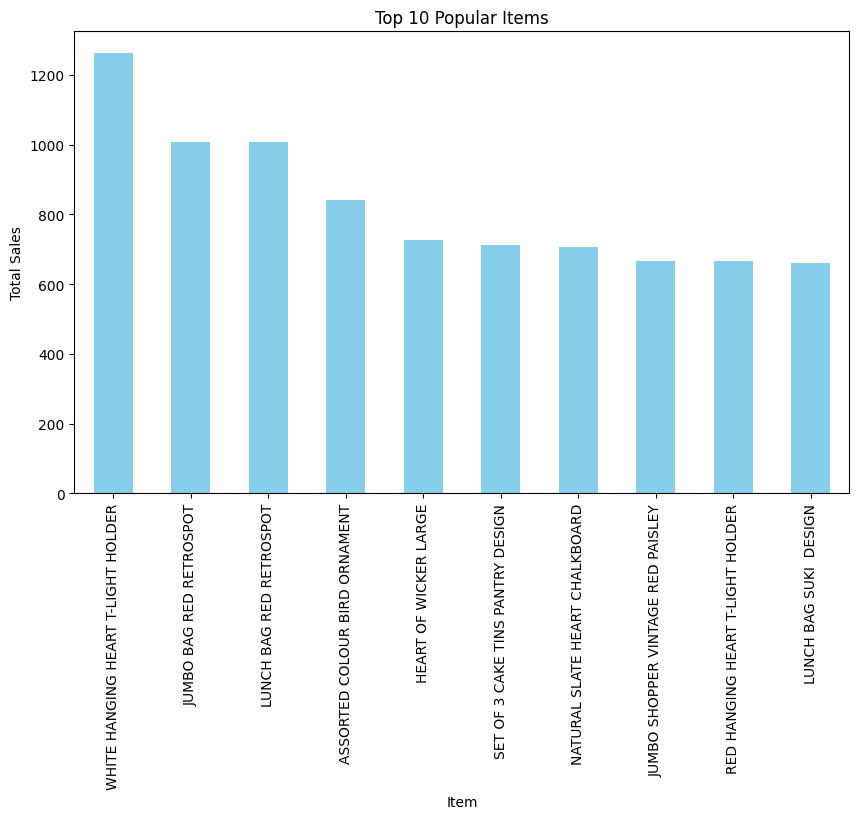

In [70]:
import matplotlib.pyplot as plt

# compute the total sales of each item
item_sales = train_data.groupby('Itemname')['Quantity'].sum()

# according to the total sales, sort the items in descending order and select the top 10 items
top_10_items = item_sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Popular Items')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


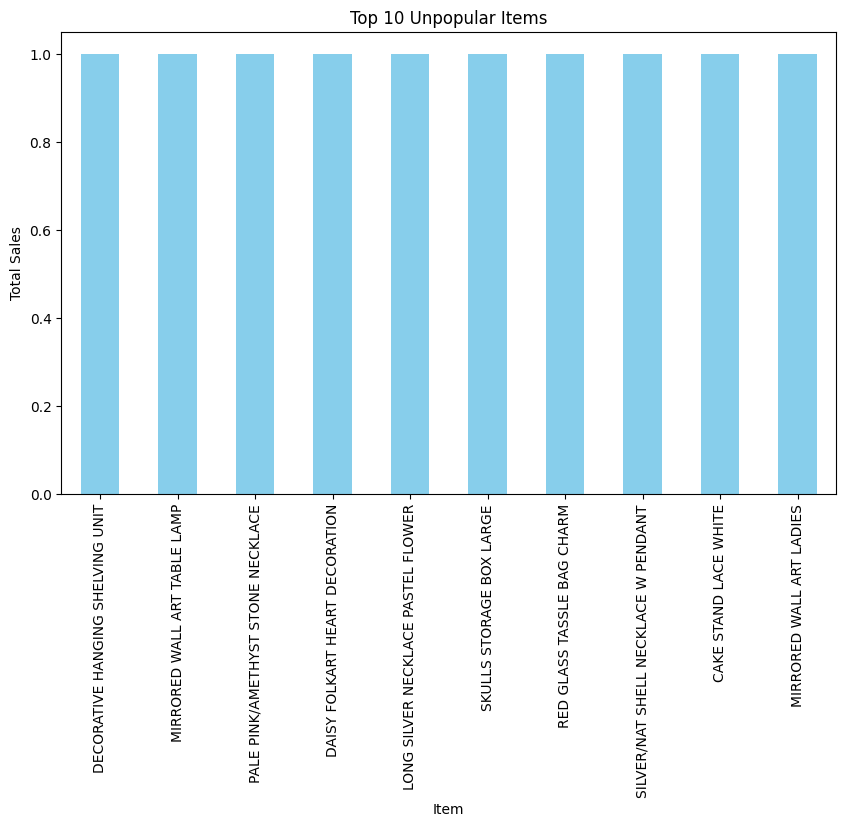

In [71]:
# sort the items in ascending order and select the top 10 items
less_10_items = item_sales.sort_values(ascending=True).head(10)

plt.figure(figsize=(10, 6))
less_10_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Unpopular Items')
plt.xlabel('Item')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()


In [ ]:

unique_subset_users = train_data['CustomerID'].unique()
unique_subset_items = train_data['Itemname'].unique()

subset_user_item_matrix = pd.DataFrame(index=unique_subset_users, columns=unique_subset_items)

for index, row in train_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    rating = row['Quantity']
    subset_user_item_matrix.loc[user_id, item_id] = rating

# fill in the missing values with 0
subset_user_item_matrix.fillna(0, inplace=True)

print(subset_user_item_matrix.iloc[:10, :20].to_string())

       KNITTED UNION FLAG HOT WATER BOTTLE  GLASS STAR FROSTED T-LIGHT HOLDER  WHITE HANGING HEART T-LIGHT HOLDER  RED WOOLLY HOTTIE WHITE HEART.  SET 7 BABUSHKA NESTING BOXES  CREAM CUPID HEARTS COAT HANGER  WHITE METAL LANTERN  HAND WARMER UNION JACK  HAND WARMER RED POLKA DOT  HOME BUILDING BLOCK WORD  BLUE COAT RACK PARIS FASHION  BOX OF VINTAGE ALPHABET BLOCKS  BOX OF VINTAGE JIGSAW BLOCKS  LOVE BUILDING BLOCK WORD  IVORY KNITTED MUG COSY  POPPY'S PLAYHOUSE BEDROOM  BOX OF 6 ASSORTED COLOUR TEASPOONS  RECIPE BOX WITH METAL HEART  POPPY'S PLAYHOUSE KITCHEN  JAM MAKING SET WITH JARS
17850                                    6                                  6                                   6                               6                             4                               8                    6                       6                          6                         0                             0                               0                             0          

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_37241/3030490498.py:13: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



## 新添加：需要找出test和training中没有交集的customerID和itemname，并且把他们给drop掉

traindata太长了所以要缩短

In [238]:
# train_data =  train_data_drop.iloc[:20000]

In [384]:
train_data = train_data_drop

#### test set

In [385]:
# check if there are any itemname is not in the train set
nonexistent_items = []
for index, row in test_data.iterrows():
    item_id = row['Itemname']
    if item_id not in train_data['Itemname'].unique():
        nonexistent_items.append(index)

# delete the rows with nonexistent items
test_data_cleaned_item = test_data.drop(nonexistent_items)
test_data_cleaned_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9711 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    9711 non-null   object 
 1   Quantity    9711 non-null   float64
 2   CustomerID  9711 non-null   float64
dtypes: float64(2), object(1)
memory usage: 303.5+ KB


In [386]:
# check if there are any customerID is not in the train set
nonexistent_customer_ids = []
for index, row in test_data_cleaned_item.iterrows():
    customer_id = row['CustomerID']
    if customer_id not in train_data['CustomerID'].unique():
        nonexistent_customer_ids.append(index)

# delete the rows with nonexistent customer IDs
test_data = test_data_cleaned_item.drop(nonexistent_customer_ids)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5112 entries, 0 to 9982
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    5112 non-null   object 
 1   Quantity    5112 non-null   float64
 2   CustomerID  5112 non-null   float64
dtypes: float64(2), object(1)
memory usage: 159.8+ KB


#### Training set

In [387]:
# check if there are any itemname is not in the train set
nonexistent_items = []
for index, row in train_data.iterrows():
    item_id = row['Itemname']
    if item_id not in test_data['Itemname'].unique():
        nonexistent_items.append(index)

# delete the rows with nonexistent items
train_data_cleaned_item = train_data.drop(nonexistent_items)
train_data_cleaned_item.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33249 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Itemname    33249 non-null  object
 1   Quantity    33249 non-null  int64 
 2   CustomerID  33249 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [388]:
nonexistent_customer_ids = []
for index, row in train_data_cleaned_item.iterrows():
    customer_id = row['CustomerID']
    if customer_id not in test_data['CustomerID'].unique():
        nonexistent_customer_ids.append(index)

# delete the rows with nonexistent customer IDs
train_data = train_data_cleaned_item.drop(nonexistent_customer_ids)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10140 entries, 61 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Itemname    10140 non-null  object
 1   Quantity    10140 non-null  int64 
 2   CustomerID  10140 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 316.9+ KB


#### 2.3 customer-item matrix

Now I will convert the data into the form of customer-item matrix

In [389]:
len(train_data.CustomerID.unique()), len(train_data.Itemname.unique())

(247, 1191)

In [390]:
# identify the users unique to the test set
unique_users = train_data['CustomerID'].unique()
unique_items = train_data['Itemname'].unique()

user_item_matrix = pd.DataFrame(index=unique_users, columns=unique_items)

# iterate over the rows in the train set and fill in the user-item matrix
for index, row in train_data.iterrows():
    user_id = row['CustomerID']
    item_id = row['Itemname']
    rating = row['Quantity']
    user_item_matrix.loc[user_id, item_id] = rating

# fill in the missing values with 0
user_item_matrix.fillna(0, inplace=True)

# check the user-item matrix
user_item_matrix.iloc[:10, :20]

/var/folders/n3/ddr1nygd4b11p0zv8kwtqx3w0000gn/T/ipykernel_37241/667173066.py:15: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,JUMBO BAG CHARLIE AND LOLA TOYS,JUMBO BAG PINK VINTAGE PAISLEY,JUMBO STORAGE BAG SUKI,JUMBO BAG PINK POLKADOT,STRAWBERRY LUNCH BOX WITH CUTLERY,STRAWBERRY CHARLOTTE BAG,LUNCH BAG RED RETROSPOT,LUNCH BOX WITH CUTLERY RETROSPOT,JUMBO BAG BAROQUE BLACK WHITE,COOK WITH WINE METAL SIGN,PINK BREAKFAST CUP AND SAUCER,PHOTO CLIP LINE,RETROSPOT LARGE MILK JUG,EDWARDIAN PARASOL BLACK,JUMBO SHOPPER VINTAGE RED PAISLEY,RED TOADSTOOL LED NIGHT LIGHT,PIGGY BANK RETROSPOT,GLASS CLOCHE SMALL,FELT EGG COSY WHITE RABBIT,BLUE OWL SOFT TOY
14688,10,10,10,10,6,4,10,6,10,0,0,0,0,0,0,0,0,0,0,0
15311,2,0,1,0,2,0,4,1,2,3,1,3,1,2,2,2,1,4,1,2
12431,0,0,0,0,0,0,10,6,0,0,0,0,6,0,0,0,0,0,0,0
17511,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13767,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
17377,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12748,2,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,2,0,0
14078,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12662,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6
15605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 3. Calculate the similarity

In [391]:
from sklearn.metrics.pairwise import cosine_similarity

# compute the cosine similarity matrix
user_similarity_matrix = cosine_similarity(user_item_matrix)

# convert the similarity matrix into a DataFrame
user_similarity_df = pd.DataFrame(user_similarity_matrix, index=user_item_matrix.index, columns=user_item_matrix.index)

print(user_similarity_df.iloc[:10, :7])

          14688     15311     12431     17511     13767     17377     12748
14688  1.000000  0.158463  0.232931  0.034416  0.000000  0.015848  0.179074
15311  0.158463  1.000000  0.187834  0.084452  0.083634  0.026443  0.124582
12431  0.232931  0.187834  1.000000  0.039633  0.152638  0.038325  0.157207
17511  0.034416  0.084452  0.039633  1.000000  0.000000  0.000000  0.065859
13767  0.000000  0.083634  0.152638  0.000000  1.000000  0.000000  0.020705
17377  0.015848  0.026443  0.038325  0.000000  0.000000  1.000000  0.096177
12748  0.179074  0.124582  0.157207  0.065859  0.020705  0.096177  1.000000
14078  0.000000  0.035594  0.000000  0.000000  0.023494  0.000000  0.039654
12662  0.122519  0.073318  0.073732  0.000000  0.000000  0.013501  0.070012
15605  0.000000  0.070890  0.015474  0.069224  0.054408  0.047813  0.036733


## 4. Methods for making recommendation

#### 4.1 get the top similar customers
Here we will use the number of purchases made by the customer as a rating, the more purchases made, the higher the rating.

In [399]:
def top_similar_users(user_similarity_matrix, user_id, n):
    similar_users = user_similarity_matrix.loc[user_id]
    
    # get the index of the top n similar users
    top_n_similar_users = similar_users.sort_values(ascending=False).iloc[1:n+1].index
    return top_n_similar_users


#### 4.2 predict the rating for each product
For each item not rated by the target user, the rating is predicted by calculating the weighted average of the ratings given by the most similar users, where the weight is the similarity between the user and the target user.

In [400]:
def predict_user_based(user_item_matrix, user_similarity_matrix, user_id, item_id):
    # get the top 20 similar users
    top_sim_users = top_similar_users(user_similarity_matrix, user_id, 20)
    
    user_ratings = user_item_matrix.loc[user_id]
    
    mean_rating = user_ratings.mean()
    
    # compute the predicted rating
    pred_rating = 0
    sim_sum = 0
    
    for other_user in top_sim_users:
        other_user_rating = user_item_matrix.loc[other_user, item_id]
        if other_user_rating > 0:
            other_user_mean = user_item_matrix.loc[other_user].mean()
            sim_user = user_similarity_matrix.loc[user_id, other_user]
            pred_rating += sim_user * (other_user_rating - other_user_mean)
            sim_sum += sim_user
    
    if sim_sum > 0:
        pred_rating = mean_rating + pred_rating / sim_sum
    else:
        pred_rating = mean_rating
    
    return pred_rating

#### 4.3 Recommends the top N items with the highest predictive scores

In [421]:
def recommend_top_n_items(train_user_item_matrix, user_similarity_matrix, test_set, N):
    recommendations = pd.DataFrame(index=test_set.index, columns=['Top_Items'])
    
    # 使用训练集中的用户项目矩阵和用户相似性矩阵
    for user_id in test_set.index:
        # 获取该用户在训练集中尚未评分的物品
        unrated_items = train_user_item_matrix.loc[user_id][train_user_item_matrix.loc[user_id] == 0].index
        
        user_predictions = {}
        for item_id in unrated_items:
            user_predictions[item_id] = predict_user_based(train_user_item_matrix, user_similarity_matrix, user_id, item_id)
        
        # 按预测评分排序
        sorted_predictions = sorted(user_predictions.items(), key=lambda x: x[1], reverse=True)
        
        # 获取前 N 个物品
        top_n_items = [item[0] for item in sorted_predictions[:N]]
        
        recommendations.loc[user_id, 'Top_Items'] = top_n_items
    
    return recommendations


## 5. Make recommendation

The training set was used to generate recommendations. The training set had too much data, which caused the algorithm to run too slowly, over five hours, so I use a subset of it (10,000 pieces of data) here.

In [403]:
len(train_data.CustomerID.unique()), len(train_data.Itemname.unique())

(247, 1191)

In [404]:
# generate recommendations for the users in the subset
subset_recommendations = recommend_top_n_items(user_item_matrix, user_similarity_df, N=10)

In [405]:
# iterate over the users and print the top 5 recommended items
for user_id, row in subset_recommendations.iterrows():
    print("Top 5 recommended items for user", user_id, ":", row['Top_Items'])

Top 5 recommended items for user 14688 : ['SET OF 4 ENGLISH ROSE COASTERS', 'RIBBON REEL CHRISTMAS SOCK BAUBLE', 'LAVENDER SCENTED FABRIC HEART', 'TRAVEL SEWING KIT', 'TEA TIME OVEN GLOVE', 'JAM MAKING SET PRINTED', 'PACK OF 12 STICKY BUNNIES', 'RED RETROSPOT SHOPPER BAG', 'CHARLOTTE BAG DOLLY GIRL DESIGN', 'VINTAGE UNION JACK BUNTING']
Top 5 recommended items for user 15311 : ['BOX OF 24 COCKTAIL PARASOLS', 'SET OF 9 HEART SHAPED BALLOONS', 'GRAND CHOCOLATECANDLE', 'LIGHT GARLAND BUTTERFILES PINK', 'WOODEN OWLS LIGHT GARLAND', 'CITRONELLA CANDLE FLOWERPOT', 'ASSORTED COLOUR BIRD ORNAMENT', 'LUNCH BOX WITH CUTLERY FAIRY CAKES', 'DINOSAUR PARTY BAG + STICKER SET', 'ANTIQUE GLASS DRESSING TABLE POT']
Top 5 recommended items for user 12431 : ['RIBBON REEL STRIPES DESIGN', 'RETROSPOT CHILDRENS APRON', 'SMALL HEART MEASURING SPOONS', 'CHARLOTTE BAG SUKI DESIGN', 'SUKI  SHOULDER BAG', 'CHARLOTTE BAG DOLLY GIRL DESIGN', 'BALLOON WATER BOMB PACK OF 35', 'JUMBO BAG TOYS', 'SKULL SHOULDER BAG', 

## 6. Five recommended examples of what users actually buy

In [422]:
test_recommendations = recommend_top_n_items(user_item_matrix, user_similarity_matrix, test_data, N=20)

KeyError: 0

In [412]:
for user_id, row in test_recommendations.iterrows():
    print("Top 5 recommended items for user", user_id, ":", row['Top_Items'])

Top 5 recommended items for user 15311.0 : ['RIBBON REEL HEARTS DESIGN', 'RIBBON REEL LACE DESIGN', 'JUMBO BAG SCANDINAVIAN PAISLEY', 'RED RETROSPOT WASHBAG', 'JUMBO STORAGE BAG SUKI']
Top 5 recommended items for user 12594.0 : ['BALLOON ART MAKE YOUR OWN FLOWERS', 'LUNCH BAG  BLACK SKULL.', 'LUNCH BAG WOODLAND', 'SKULL SHOULDER BAG', 'CHARLOTTE BAG SUKI DESIGN']
Top 5 recommended items for user 16401.0 : ['JUMBO STORAGE BAG SUKI', 'TRAVEL CARD WALLET KEEP CALM', 'TRAVEL CARD WALLET RETROSPOT', 'GRAND CHOCOLATECANDLE', 'HANGING HEN ON NEST DECORATION']
Top 5 recommended items for user 16814.0 : ['FROSTED WHITE BASE', 'JUMBO BAG PINK POLKADOT', 'TRAVEL SEWING KIT', 'MAGIC DRAWING SLATE SPACEBOY', 'WATERING CAN GARDEN MARKER']
Top 5 recommended items for user 16726.0 : ['TEA TIME OVEN GLOVE', 'TOILET METAL SIGN', 'LUNCH BAG SUKI  DESIGN', 'RIDGED GLASS T-LIGHT HOLDER', 'GRAND CHOCOLATECANDLE']
Top 5 recommended items for user 16265.0 : ['DOORMAT RED RETROSPOT', 'HEN HOUSE W CHICK STANDIN

## Evaluation

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5112 entries, 0 to 9982
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Itemname    5112 non-null   object 
 1   Quantity    5112 non-null   float64
 2   CustomerID  5112 non-null   float64
dtypes: float64(2), object(1)
memory usage: 159.8+ KB


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10140 entries, 61 to 39999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Itemname    10140 non-null  object
 1   Quantity    10140 non-null  int64 
 2   CustomerID  10140 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 316.9+ KB


In [419]:
def evaluate_recommendations(recommendations, test_data):
    total_correct_predictions = 0
    total_predictions = 0

    for user_id, row in recommendations.iterrows():
        recommended_items = row['Top_Items']
        actual_items = test_data[test_data['CustomerID'] == user_id]['Itemname'].tolist()
        
        # print("User ID:", user_id)
        # print("Actual Items:", actual_items)
        # print("Recommended Items:", recommended_items)

        correct_predictions = len(set(recommended_items) & set(actual_items))
        
        total_correct_predictions += correct_predictions
        total_predictions += len(recommended_items)
    
    accuracy = total_correct_predictions / total_predictions
    return accuracy

# 调用评估函数
accuracy = evaluate_recommendations(test_recommendations, test_data)
print("Accuracy:", accuracy)

Accuracy: 0.0


In [417]:
test_recommendations.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 15311.0 to 14534.0
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Top_Items  250 non-null    object
dtypes: object(1)
memory usage: 12.0+ KB


In [418]:
def compute_precision(test_set, recommendations):
    total_users = len(test_set)
    correct_predictions = 0
    
    for user_id in test_set.index:
        actual_items = test_set.loc[user_id, 'Itemname']  # 假设 'Itemname' 列包含实际物品
        
        recommended_items = recommendations.loc[user_id, 'Top_Items']
        
        # 计算推荐物品与实际物品的交集数量
        intersection = len(set(actual_items) & set(recommended_items))
        
        # 更新正确预测的数量
        correct_predictions += intersection
        
    # 计算准确率
    precision = correct_predictions / (total_users * len(recommended_items))
    
    return precision

# 计算准确率
precision = compute_precision(test_data, test_recommendations)
print("Precision:", precision)


ZeroDivisionError: division by zero